In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from wavelets import *
from draws import *
from lyapunov_exponents import *
from multistability import *
from BP_dynamics import *
# import pywt
from tqdm.auto import trange 
from Poincare import dist, jacobian, poincare, poincare_3D, bifurcation_diagram, period, floquet
from IPython.display import display, Latex

In [3]:
plt.rcParams.update({'font.size': 25})

## Определение параметров системы:

In [4]:
Iext = 0.5 # возбуждающий импульс на пирамидальную клетку (P)
G = 0.5 # проводимость мембран -- определяют относительный вклад клетки в динамику ансамбля
Eex = 0 # напряжение на выходной клетке (P) -- для активаторной, возбуждающей клетки
Ein = -5 # напряжение на входной клетке (B) -- для ингибиторной, тормозящей клетки
eps = 0.3 # временной масштаб осцилляций (отношение быстрой переменной к медленной)
a = 0.5 # параметры кинетики суммарного ионного тока u
b = 0.8 # параметры кинетики суммарного ионного тока u
A = 1 # синаптический параметр
vsl = 0.1 # синаптический параметр (открытие синапсов быстрее чем закрытие)


scale = np.linspace(0, 60, 101)

# Решение системы ФХН при фиксированном параметре $Bbp = 0.12$ и изменении $Bpb = 0.15-0.3$

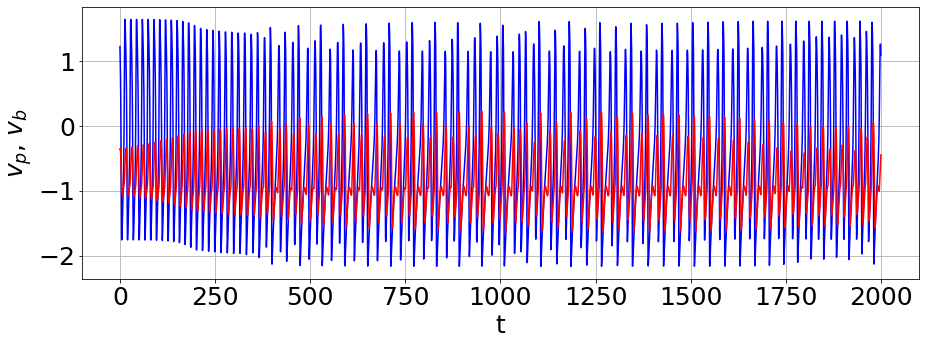

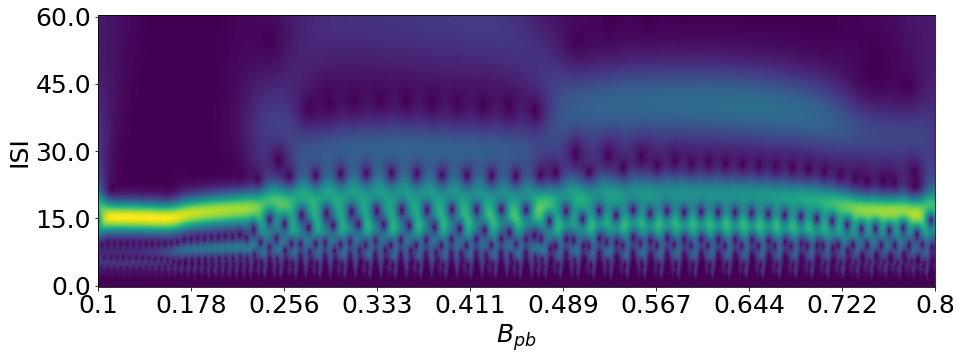

In [5]:
Bbp = 0.12 
Bpbmin = 0.1 
Bpbmax = 0.8 

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)

wavelet_draw(args, args2, scale, ts=2000, nt=2**15, Bmin=Bpbmin, Bmax=Bpbmax)

# phase_portrait(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)

## Далее следует исследование области при $B_{bp} = 0.12$ и $B_{pb} = 0.22-0.26$ при уменьшенном шаге по параметру Bpb (в данной области ожидаем увидеть хаос)

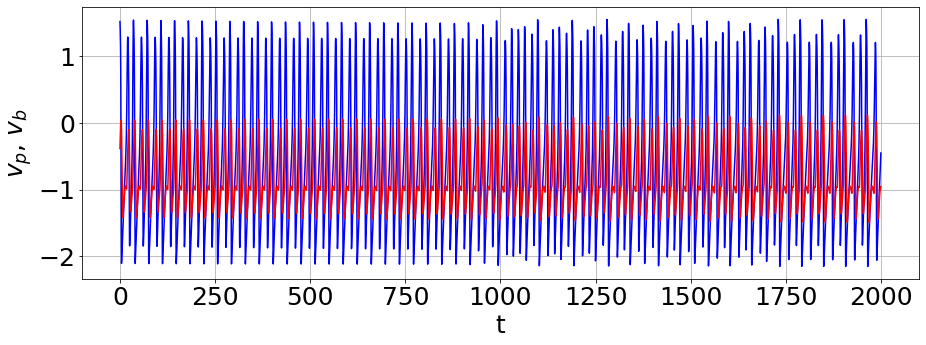

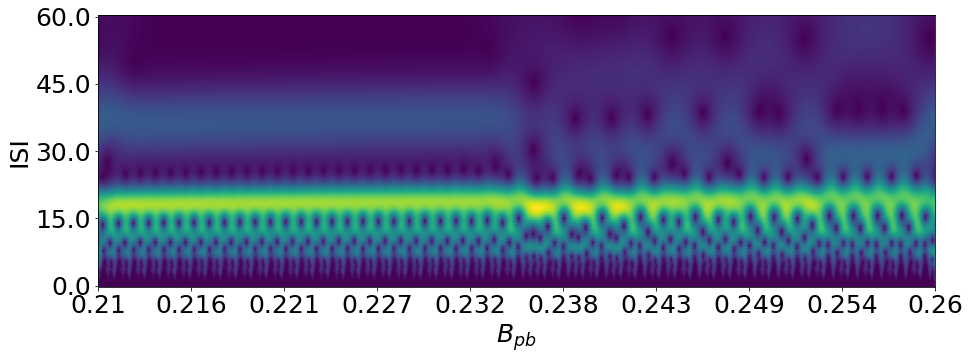

In [7]:
Bbp = 0.12 # синаптический параметр
Bpbmin = 0.21 # синаптический параметр
Bpbmax = 0.26 # синаптический параметр

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)

wavelet_draw(args, args2, scale, ts=2000, nt=2**15, Bmin=Bpbmin, Bmax=Bpbmax)

## Далее рассчитаем показатель Ляпунова по определению: будем смотреть на расхождение изначально близких траекторий и рисовать логарифм расхождения, таким образом, пронаблюдаем показатель экспоненты.

(32768, 6) (32768,)
32768


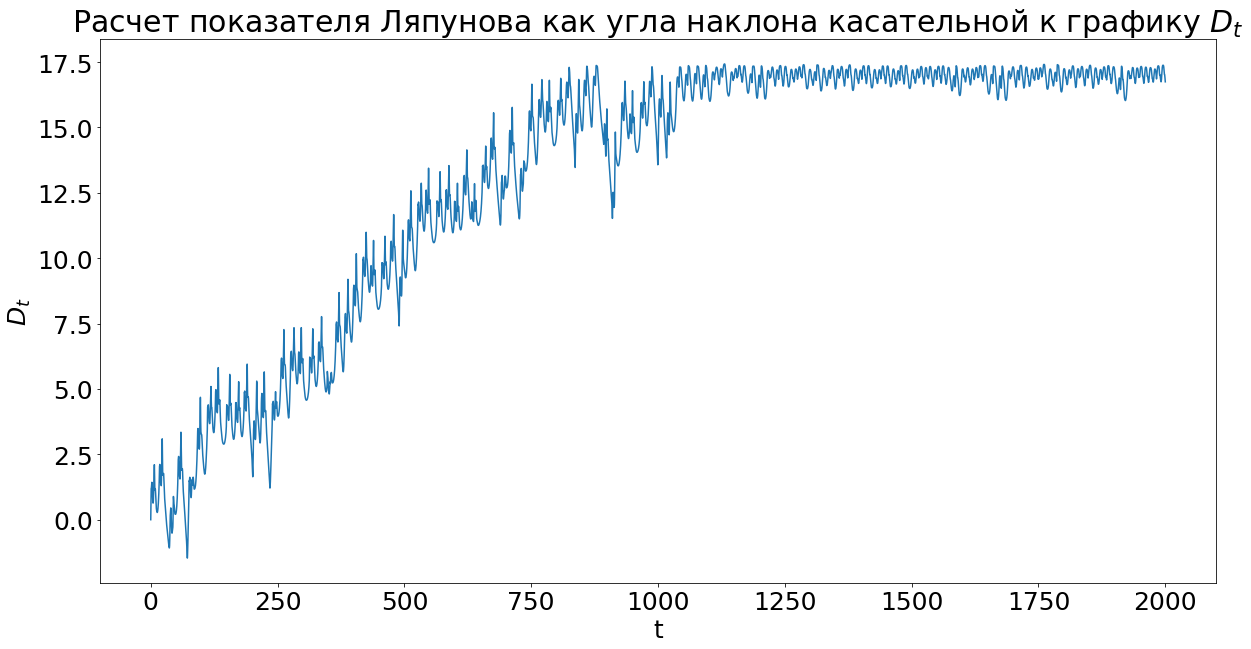

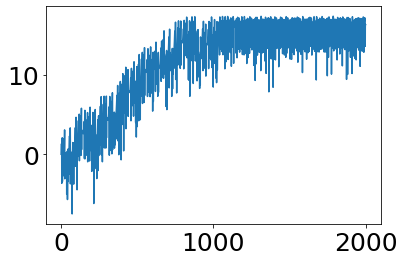

In [115]:
Bbp = 0.12
Bpb = 0.235

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

sol, t = calcODE(args, -1.5, -1.5, 0.5, 0.5, 0.5, 0.5, ts=3000, nt=2**15)

print(sol.shape, t.shape)
print(2**15)

ts = 3000
sol1, t = calcODE(args, *sol[-1], nt=2**15)
sol2, t = calcODE(args, *(sol[-1] - [0.0000001, 0, 0, 0, 0, 0]), nt=2**15)

plt.figure(figsize=(20, 10))
plt.plot(t, np.log(np.linalg.norm(sol1 - sol2, axis=1) / и
                   np.linalg.norm(sol1[0] - sol2[0])))
plt.title("Расчет показателя Ляпунова как угла наклона касательной к графику $D_t$")
plt.xlabel("t")
plt.ylabel("$D_t$")
plt.show()

plt.plot(t, np.log(np.abs(sol1[:, 0] - sol2[:, 0]) / 
                   np.linalg.norm(sol1[0] - sol2[0])))
plt.show()


In [124]:
Bbp = 0.12
Bpb = 0.235

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

mean_lyap, std_lyap = lyapunov_first_statistics(args, 50)

In [125]:
mean_lyap

0.021543770819915594

In [159]:
lyapunov_first(args)

0.016411754125779013

In [11]:
Bbp = 0.12 
Bpbmin = 0.22 
Bpbmax = 0.5 

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)
scale = np.linspace(0, 60, 100)

args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)
directly = max_wavelet_bootstrap(args, args2, scale)

args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bbp, Bpbmax, Bpbmin, vsl)
inverse = max_wavelet_bootstrap(args, args2, scale)

(100, 32768, 100)
(100, 32768, 100)


(5.0, 25.0)

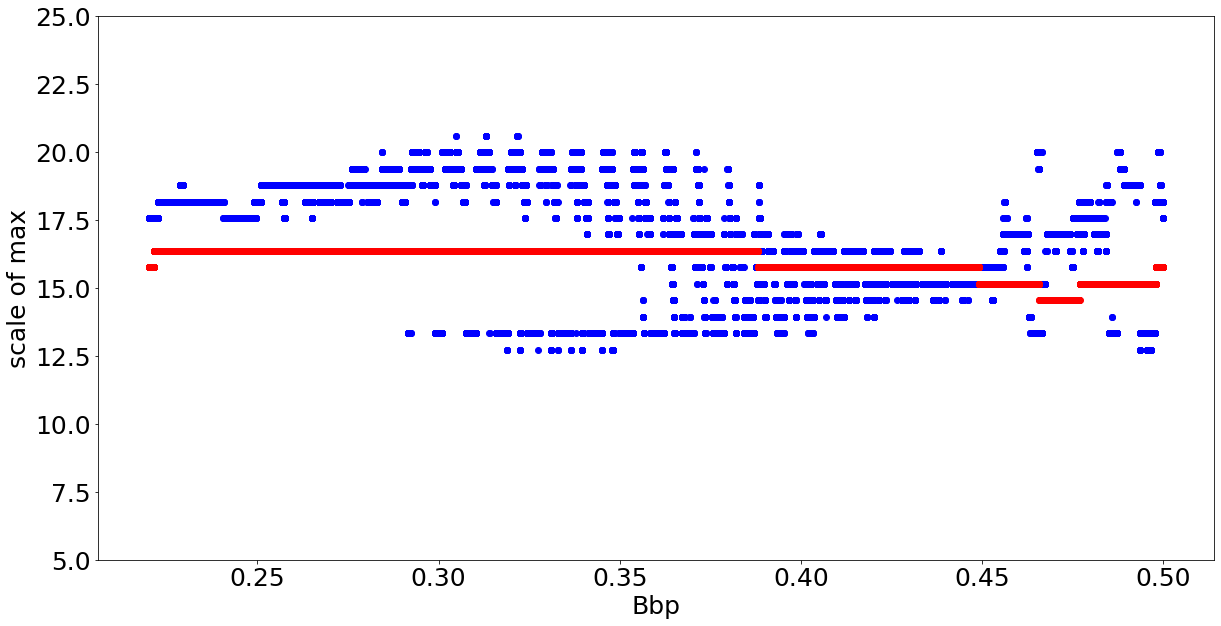

In [28]:
plt.figure(figsize=(20, 10))
plt.scatter(np.linspace(Bpbmin, Bpbmax, len(directly[0])), directly[0], c='b')
plt.scatter(np.linspace(Bpbmin, Bpbmax, len(inverse[0])), inverse[0][::-1], c='r')
plt.xlabel('Bbp')
plt.ylabel('scale of max')
plt.ylim(5, 25)
# plt.title('Петля гистерезиса')

## Найдем характерные периоды колебаний аттракторов: гистограммы ниже по порядку: область до предполагаемого хаоса, область хаоса и область после хаоса для параметров B

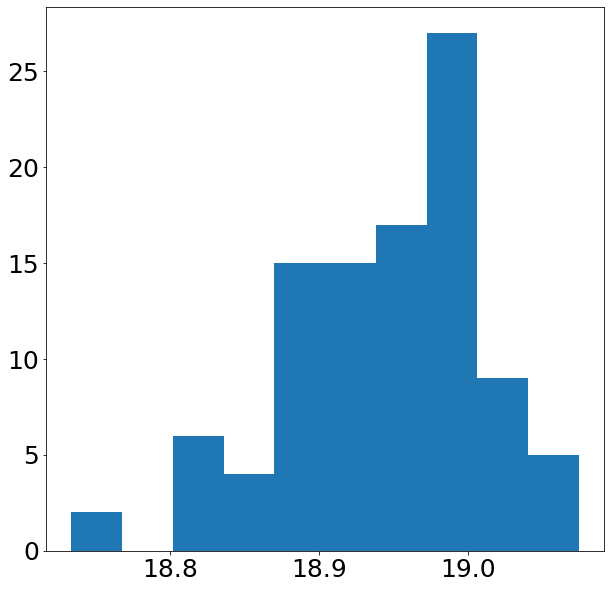

In [37]:
Bbp = 0.12
Bpbmin = 0.24 
Bpbmax = 0.26 
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

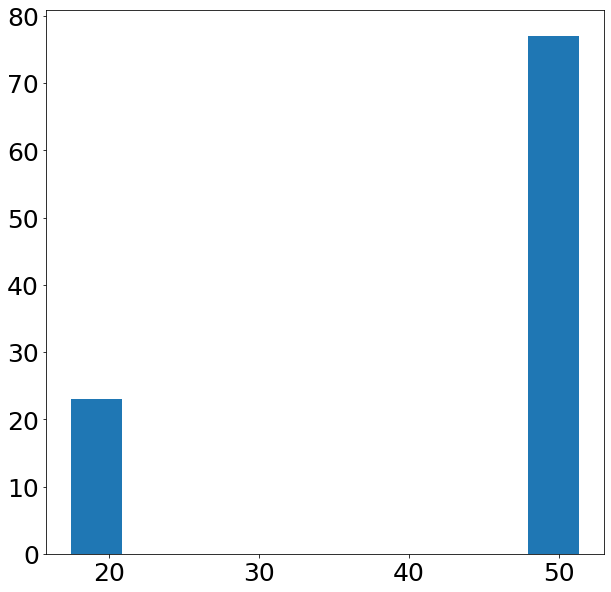

In [15]:
Bbp = 0.12
Bpbmin = 0.235
Bpbmax = 0.235
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

## Далее следует исследование области при $B_{bp} = 0.12$ и $B_{pb} = 0.44-0.48$ при уменьшенном шаге по параметру Bpb (в данной области ожидаем увидеть хаос)

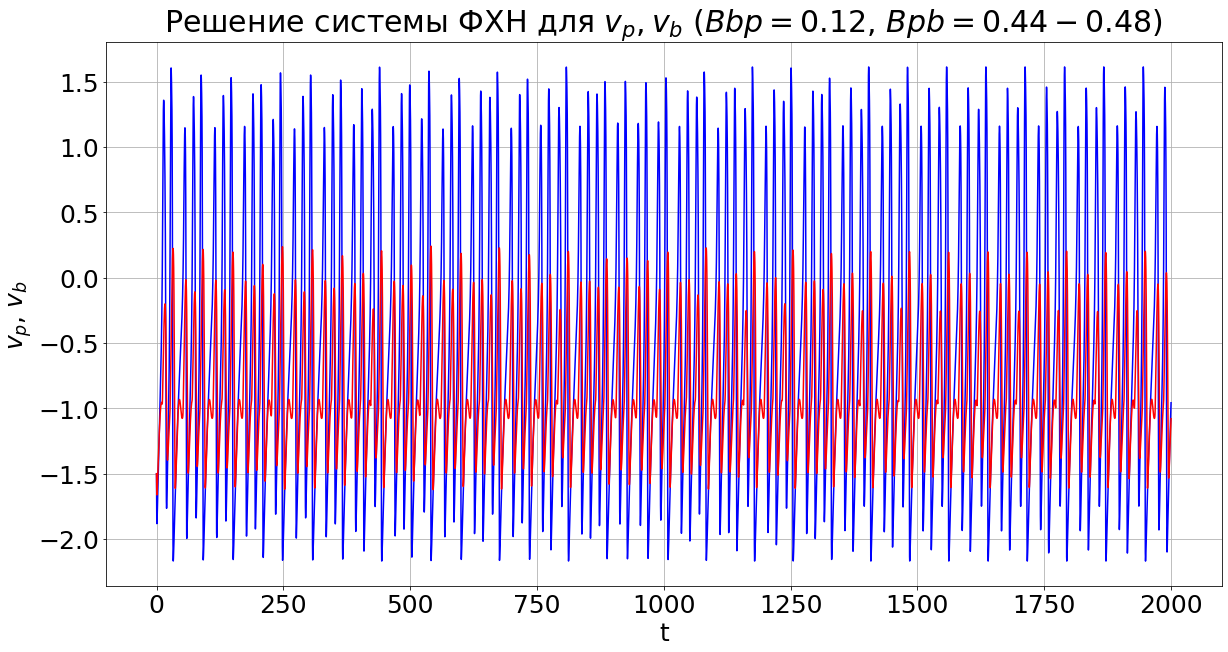

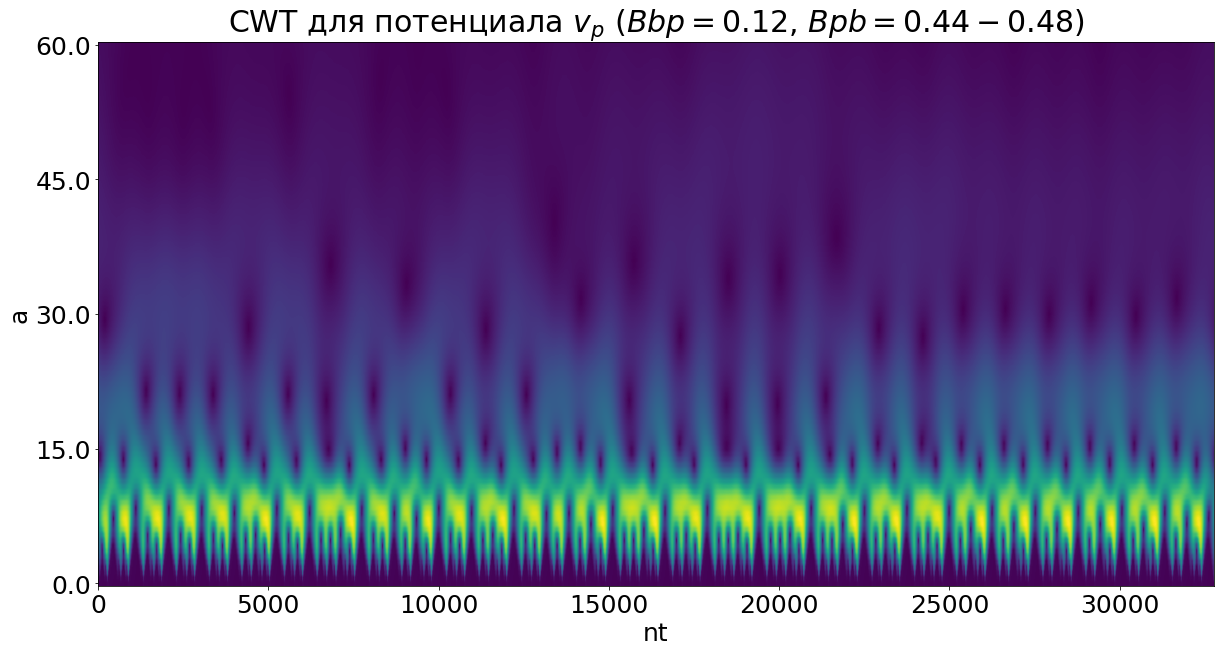

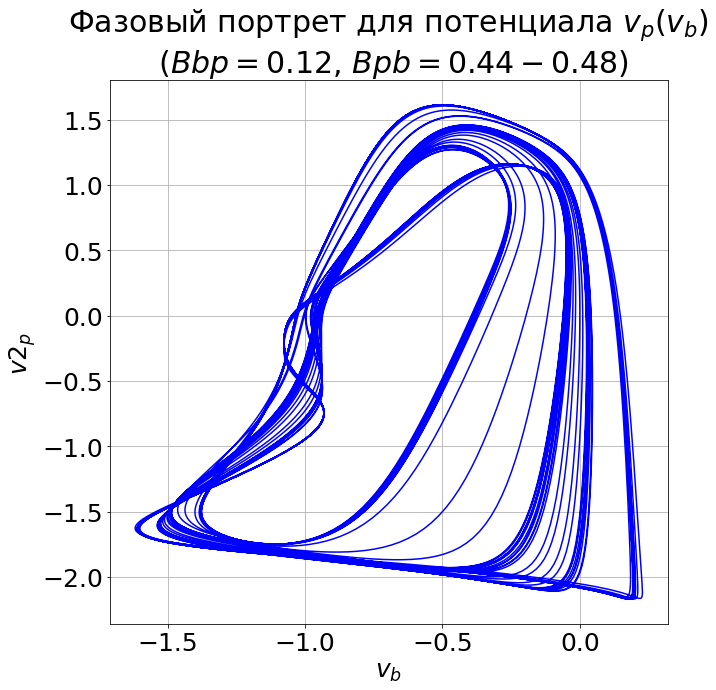

In [11]:
Bbp = 0.12 
Bpbmin = 0.44 
Bpbmax = 0.48 

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)
wavelet_draw(args2, scale, ts=2000, nt=2**15)
phase_portrait(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)

## Отображение Пуанкаре

In [6]:
Bbp = 0.12
Bpb = 0.1
Bpbmin = 0.1
Bpbmax = 0.8


args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)

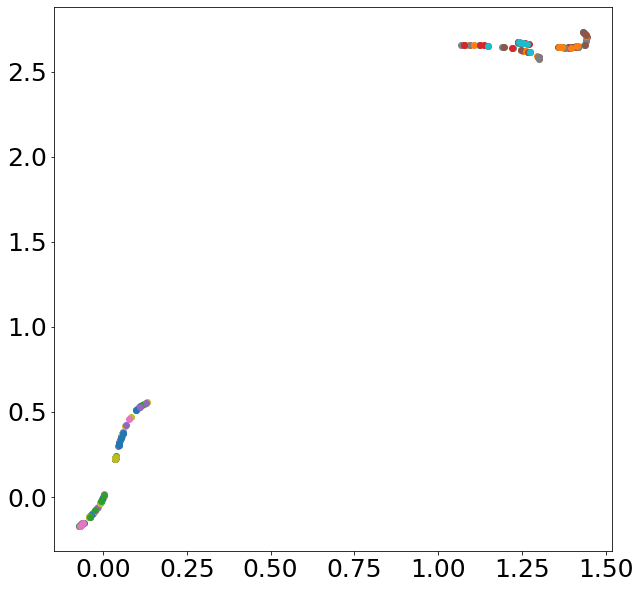

In [23]:
Bbp = 0.12
Bpb = 0.455
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

_, _ = poincare(args, Bpb)

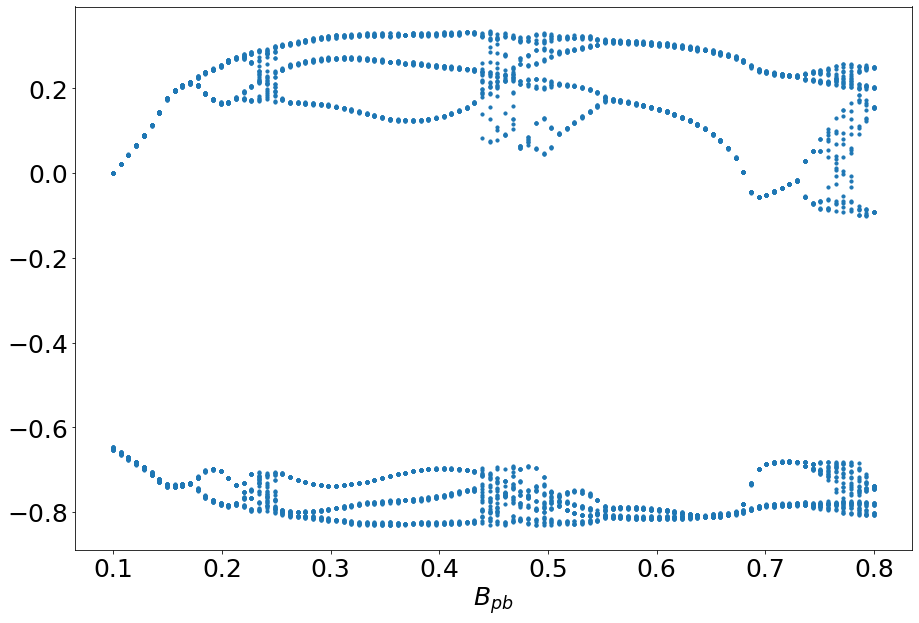

In [14]:
periods, xs = bifurcation_diagram(args, Bpbmin, Bpbmax)

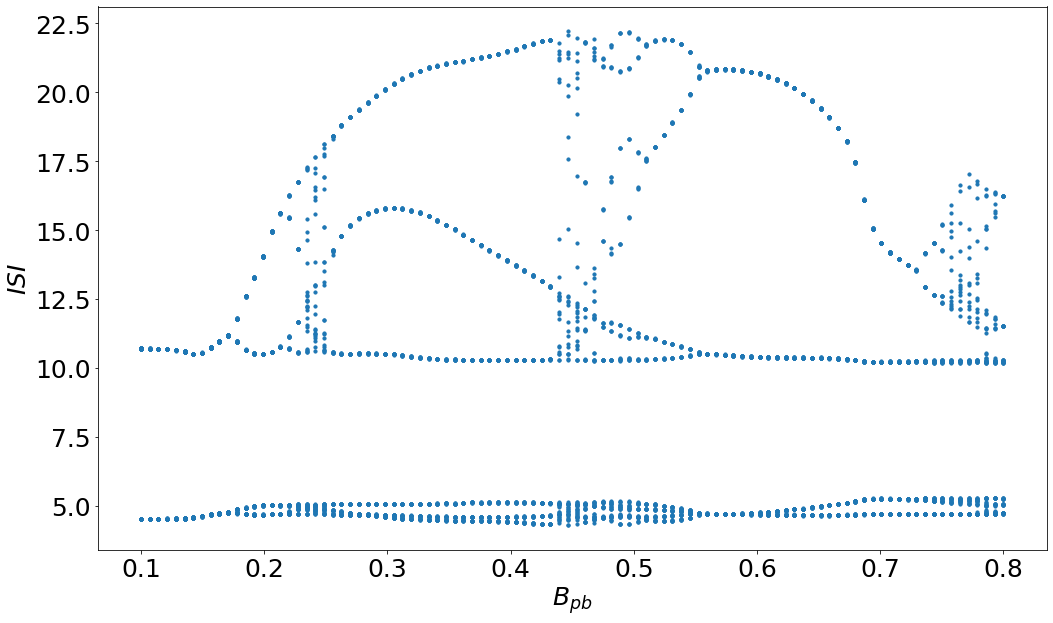

In [16]:
plt.figure(figsize=(17, 10))
plt.scatter([i[0] for i in periods], [i[1] for i in periods], s=10)
plt.ylabel('$ISI$')
plt.xlabel('$B_{pb}$')
plt.show()

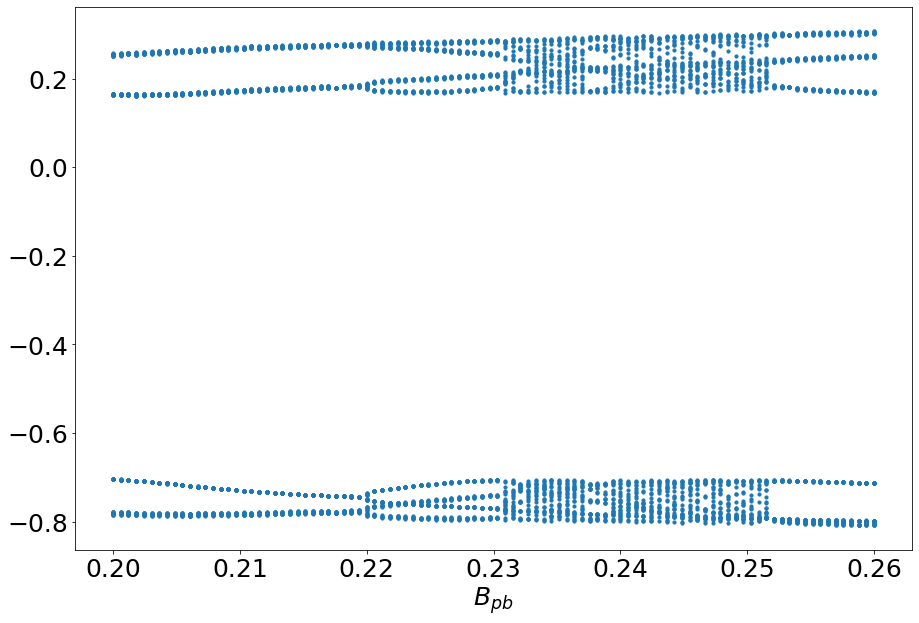

In [12]:
periods, xs = bifurcation_diagram(args, Bpbmin=0.2, Bpbmax=0.26)

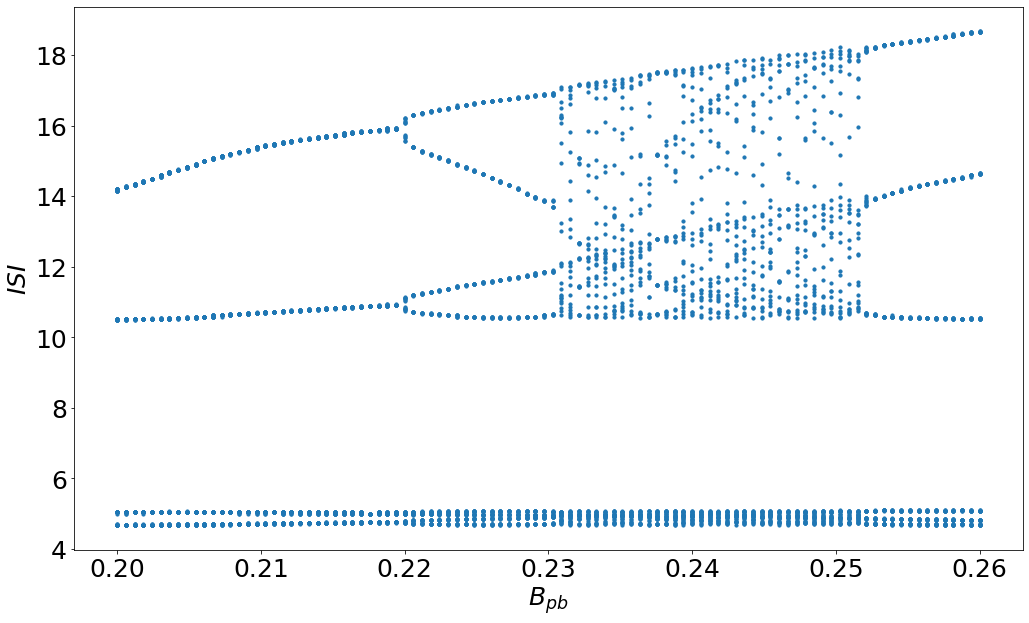

In [13]:
plt.figure(figsize=(17, 10))
plt.scatter([i[0] for i in periods], [i[1] for i in periods], s=10)
plt.ylabel('$ISI$')
plt.xlabel('$B_{pb}$')
plt.show()

T = 100


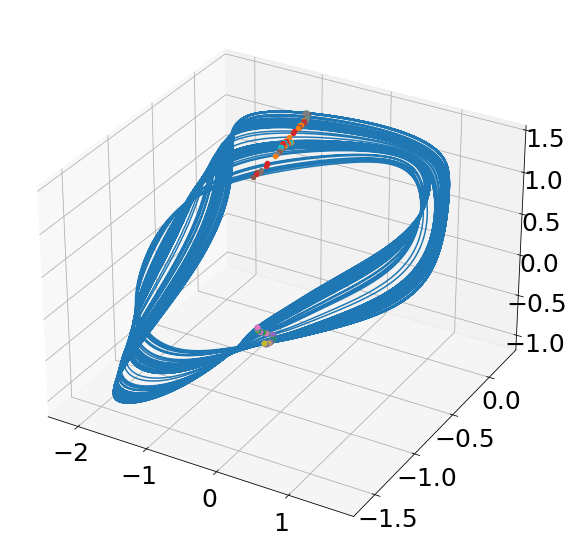

In [15]:
Bbp = 0.12
Bpb = 0.455
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

poincare_3D(args)

In [21]:
initial_conditions=(-1.5, -1.5, 0.5, 0.5, 0.5, 0.5)
ts=4000
nt=2 ** 20
sol, t = calcODE(args, *initial_conditions, ts=ts, nt=nt)

In [ ]:
plt.plot(sol[:, ])

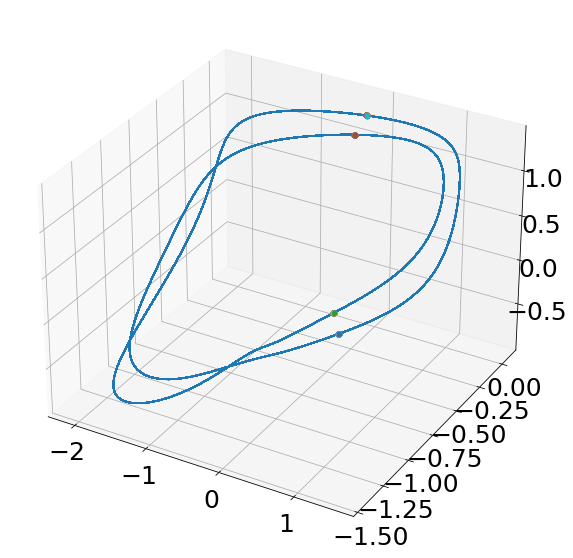

In [27]:
Bbp = 0.12
Bpb = 0.218
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

poincare_3D(args)

# Вычисление мультипликаторов Флоке для Bbp = 0.08, Bpb = 0.36

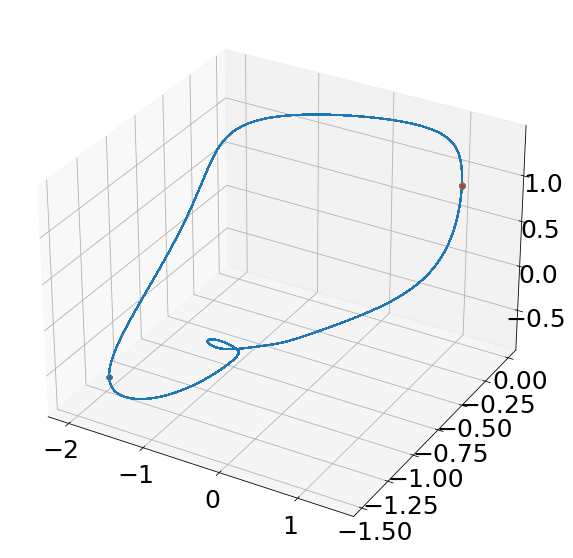

T = 0.05960464655174752
Multipliers: [0.98240339-0.03195511j 0.98119027+0.03178279j 0.98119027-0.03178279j
 0.97877091+0.j         0.99524298+0.j        ]

Проверка условия с дивергенцией: 


  0%|          | 0/33554432 [00:00<?, ?it/s]

These values must bealmost  the same
(0.9222781737177017-0.029999383586867757j) 0.7846333627082223


In [12]:
Bbp = 0.08
Bpb = 0.36
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)
initial_conditions=[-1.5, -1.5, 0.5, 0.5, 0.5, 0.5]

poincare_3D(args)

mus = floquet(args, initial_conditions)

# Вычисление мультипликаторов Флоке для Bbp = 0.12, Bpb = 0.218

In [16]:
9.885584e-01 * 7.987572e-03 * 1.716628e-06 * 2.120502e-07 * 1.395658e-10

4.0115388679302144e-25

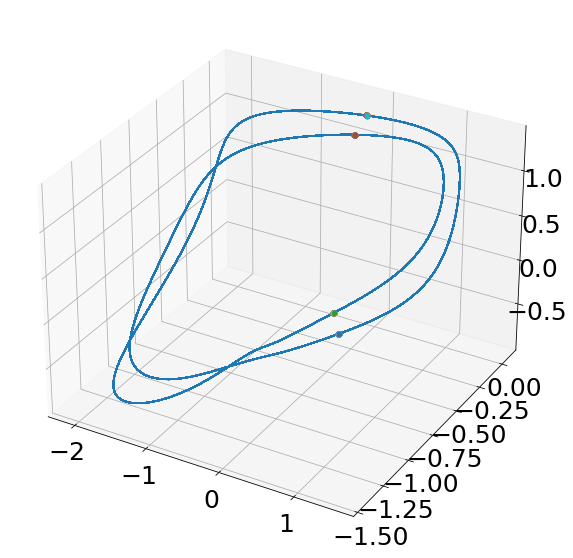

T = 36.52870763923847
Multipliers: [-9.10258847e-01 -4.36813620e-03 -9.27474739e-08 -1.16270312e-11
  1.78297595e-08]

Проверка условия с дивергенцией: 


  0%|          | 0/1048576 [00:00<?, ?it/s]

These values must be almost the same
7.645000022103571e-29 5.418706956286821e-33


In [23]:
Bbp = 0.12
Bpb = 0.218
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)
initial_conditions=[-1.5, -1.5, 0.5, 0.5, 0.5, 0.5]

poincare_3D(args)

mus = floquet(args, initial_conditions)

# Вычисление мультипликаторов Флоке для Bbp = 0.12, Bpb = 0.219

In [21]:
9.737833e-01 * 2.602762e-05 * 3.706262e-06 * 8.370640e-09 * 5.701254e-08

4.4829299327438065e-26

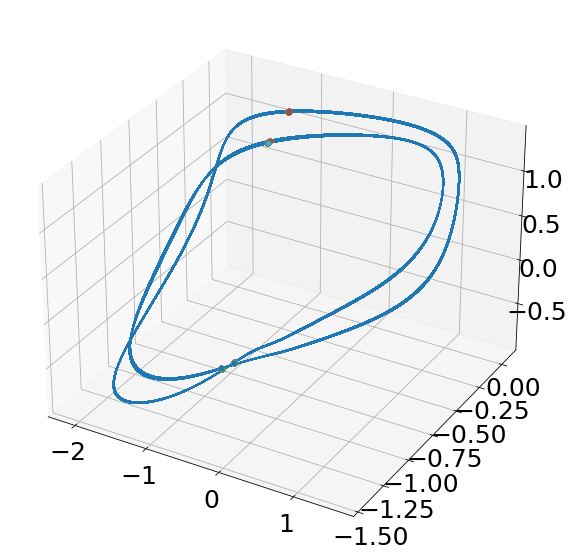

T = 73.16470364227008
Multipliers: [ 9.31248100e-01+0.00000000e+00j  1.69888744e-05+0.00000000e+00j
  9.14920135e-15+0.00000000e+00j -2.44576169e-16+1.06490459e-15j
 -2.44576169e-16-1.06490459e-15j]

Проверка условия с дивергенцией: 


  0%|          | 0/1048576 [00:00<?, ?it/s]

These values must be almost the same
(1.7280609683787836e-49+0j) 1.7018620355287234e-60


In [24]:
Bbp = 0.12
Bpb = 0.219
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)
initial_conditions=[-1.5, -1.5, 0.5, 0.5, 0.5, 0.5]

poincare_3D(args)

mus = floquet(args, initial_conditions)

# Вычисление мультипликаторов Флоке для Bbp = 0.12, Bpb = 0.217

In [22]:
8.843374e-01 * 8.717925e-03 * 4.924883e-06 * 9.988918e-07 * 1.233149e-06

4.6769318474249916e-20

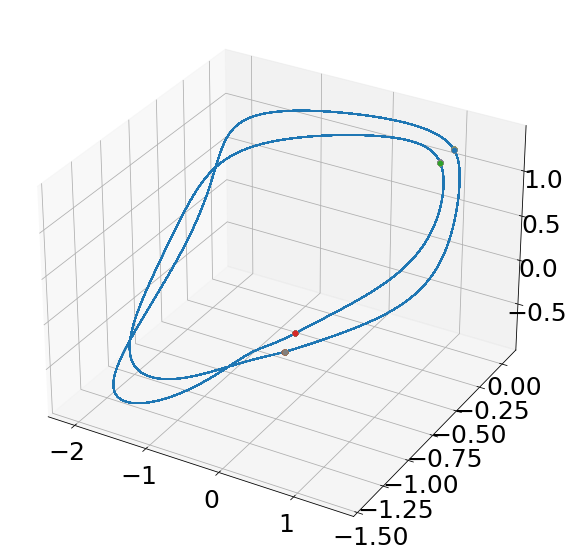

T = 36.46016229570396
Multipliers: [-8.01319502e-01 -4.86487461e-03 -1.61794069e-07 -1.24531163e-11
  1.14578058e-08]

Проверка условия с дивергенцией: 


  0%|          | 0/1048576 [00:00<?, ?it/s]

These values must be almost the same
8.999522359596481e-29 7.889258327808666e-33


In [25]:
Bbp = 0.12
Bpb = 0.217
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)
initial_conditions=[-1.5, -1.5, 0.5, 0.5, 0.5, 0.5]

poincare_3D(args)

mus = floquet(args, initial_conditions)

# Appendix

## Проверка правильности вычисления якобиана 

In [397]:
import jax
from jax import numpy as jnp


def first(z, args):
    Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl = args
    vp, vb, up, ub, sp, sb = z
    
    dzdt = [vp - vp ** 3 / 3 - up + Iext + G * sb * (Ein - vp),  
            vb - vb ** 3 / 3 - ub + G * sp * (Eex - vb),  
            eps * (vp + a - b * up),
            eps * (vb + a - b * ub),
            A / 2 * (1 + jnp.tanh(vp / vsl)) * (1 - sp) - Bpb * sp,
            A / 2 * (1 + jnp.tanh(vb / vsl)) * (1 - sb) - Bbp * sb]

    return jnp.array(dzdt)


def second(z, args):
    vp, vb, up, ub, sp, sb = z
    Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl = args
    J = jnp.array([
        [1 - vp ** 2 - G * sb, 0, -1, 0, 0, G * (Ein - vp)],
        [0, 1 - vb ** 2 - G * sp, 0, -1, G * (Eex - vb), 0],
        [eps, 0, -eps * b, 0, 0, 0],
        [0, eps, 0, -eps * b, 0, 0],
        [A / 2 * (1 - sp) / (jnp.cosh(vp / vsl)) ** 2 / vsl, 0, 0, 0, -A / 2 * (1 + jnp.tanh(vp / vsl)) - Bpb, 0],
        [0, A / 2 * (1 - sb) / (jnp.cosh(vb / vsl)) ** 2 / vsl, 0, 0, 0, -A / 2 * (1 + jnp.tanh(vb / vsl)) - Bbp]
    ])
    return J


args = Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl
z0 = sol[-1, :]  # jnp.array([-1.5, -1.5, 0.5, 0.5, 0.5, 0.5])

print(first(z0, args))
print(second(z0, args))
print(jax.jacfwd(first)(z0, args))
print()

delta = second(z0, args) - jax.jacfwd(first)(z0, args)
for i in range(6):
    for j in range(6):
        print(f'{delta[i, j]:.9f}', end=' ')
    print()

[-0.23362412 -0.38801178 -0.5556589  -0.00744771 -0.12975521 -0.02564267]
[[-2.5021567e+00  0.0000000e+00 -1.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.5787507e+00]
 [ 0.0000000e+00  5.1036191e-01  0.0000000e+00 -1.0000000e+00
   2.1910866e-01  0.0000000e+00]
 [ 3.0000001e-01  0.0000000e+00 -2.3999999e-01  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  3.0000001e-01  0.0000000e+00 -2.3999999e-01
   0.0000000e+00  0.0000000e+00]
 [ 8.0264519e-16  0.0000000e+00  0.0000000e+00  0.0000000e+00
  -2.1799999e-01  0.0000000e+00]
 [ 0.0000000e+00  2.4525425e-03  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.2015622e-01]]
[[-2.5021570e+00  0.0000000e+00 -1.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.5787506e+00]
 [ 0.0000000e+00  5.1036191e-01  0.0000000e+00 -1.0000000e+00
   2.1910866e-01  0.0000000e+00]
 [ 3.0000001e-01  0.0000000e+00 -2.4000001e-01  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  3.0000001e-01  0.0000000e+00 -2.4000001e-01
   0.000

# Старое вычисление мультипликаторов Флоке по временным рядам

In [13]:
def floquet_old(args, initial_conditions=[-1.5, -1.5, 0.5, 0.5, 0.5, 0.5], ts=20000, nt=2 ** 25):
    
    sol, t = calcODE(args, *initial_conditions, ts, nt)
    T = period(sol[-nt // 2:, :])
    T = t[T] - t[0]    
    print(f'T = {T}')

    epsilon = 1e-5
    A = np.zeros((6, 6))

    for i in range(6):
        x1 = sol[-1]
        x2 = x1 + np.array([0, 0, 0, 0, 0, 0])
        x2[i] += epsilon
        
        sol1, t = calcODE(args, *x1, ts=T, nt=2 ** 23)
        sol2, t = calcODE(args, *x2, ts=T, nt=2 ** 23)
        
        A[i, :] = (sol2[-1] - sol1[-1]) / epsilon
    
    return A

In [14]:
initial_conditions=[-1.5, -1.5, 0.5, 0.5, 0.5, 0.5]
Bbp = 0.12
Bpb = 0.218
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)


fl_2 = floquet_old(args, initial_conditions=initial_conditions)
mus_218 = np.linalg.eigvals(fl_2)[1:]
print(mus_218)

T = 36.52870763923847
[ 1.00032489e+00  2.55245383e-03 -2.22055910e-03  4.34234925e-07
 -7.71723464e-05]


In [16]:
Bbp = 0.12
Bpb = 0.219
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

fl_2 = floquet_old(args, initial_conditions=initial_conditions)
mus_219 = np.linalg.eigvals(fl_2)[1:]
print(mus_219)

T = 73.16470364227008
[ 8.94545729e-01 -1.19733552e-02 -3.88961146e-04 -2.92112876e-07
  2.15036101e-03]


In [17]:
Bbp = 0.12
Bpb = 0.217
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

fl_2 = floquet_old(args, initial_conditions=initial_conditions)
mus_217 = np.linalg.eigvals(fl_2)[1:]
print(mus_217)

T = 36.46016229570396
[-8.01194069e-01 -4.82708644e-03  1.41339610e-05  9.38353142e-04
  5.77586530e-03]
